In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re 

In [2]:
##loading dataset

train_data = pd.read_excel("Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
##let's check missing values in dataset

train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
##we drop null values from dataset
train_data.dropna(inplace = True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data['Duration'].value_counts() ##we can see that duration features in hour and minutes

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
29h 10m      1
37h 10m      1
27h 55m      1
36h 25m      1
3h 25m       1
Name: Duration, Length: 368, dtype: int64

 - Now we do the EDA
 - From the dataset we can see that, 'Date_of_Journey' is object data type, Therefore, we have to convert this datatype into timestamps data type, So as use this column properly for prediction.
 - We can use to_datetime() function to convert object to timestampes data type.
 - "".dt.day method will extract only day of that date, & "".dt.month method will extract only month of that date.

In [11]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'], format = "%d/%m/%Y").dt.day

In [12]:
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format = "%d/%m/%Y").dt.month

In [13]:
 train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
#since we have converted date_of_journey feature into integers, now we can drop as it is no of use.

train_data.drop('Date_of_Journey', inplace = True, axis = 1)

In [15]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
##Departure Time is when a plane leaves the gate.
##Similar to DateofJourney we can extract values from Dep_Time.
##Extracting hours from Dep_time
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

##Extracting minutes from Deptime
train_data['Dep_minutes'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [18]:
#now we can drop dep_time feature as it is no of use.
train_data.drop('Dep_Time', axis = 1, inplace = True)

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [20]:
##Arrival time is when the plane pulls up to gate.
##Similar to Day of Journey we can exttract values from arrival_time.

##Extraccting Hour
train_data['Arrival_Hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

##Extracting Minutes
train_data['Arrvial_Minutes'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

##now we can drop the arrivale time feature as it is no of use.
train_data.drop(['Arrival_Time'], axis = 1, inplace = True)

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrvial_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [22]:
## Time taken by plane to reach destination is called Duration.
## It is difference between Departure time and arrival time.

##assining and coverting duration column to lists
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:  ##check if duration contains only hour or minute
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m" #adds 0 minute
        else:
            duration[i] = "0h " + duration[i]  ##adds 0 hour
        
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))  ##extract hours from duration
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))  ##extract only minutes from duration
    

In [23]:
list(train_data['Duration'])

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [24]:
#now we adding duration_hours and durations_mins list to train_data dataframe

train_data['Duration_hour'] = duration_hours
train_data['Duration_mins'] = duration_mins

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrvial_Minutes,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [26]:
##now we drop duration featues as it is no of use.
train_data.drop('Duration', axis = 1, inplace = True)

In [27]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrvial_Minutes,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


#### Handling Categorical Data 
 - We can handle many way categorical data, Some of them are:
 1. "Nominal data" -> data are not in order : Here we used OneHotEncoder.
 2. "Ordinal data" -> data are in order : Here we used LabelEncoder.

In [28]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minutes', 'Arrival_Hour', 'Arrvial_Minutes', 'Duration_hour',
       'Duration_mins'],
      dtype='object')

In [29]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

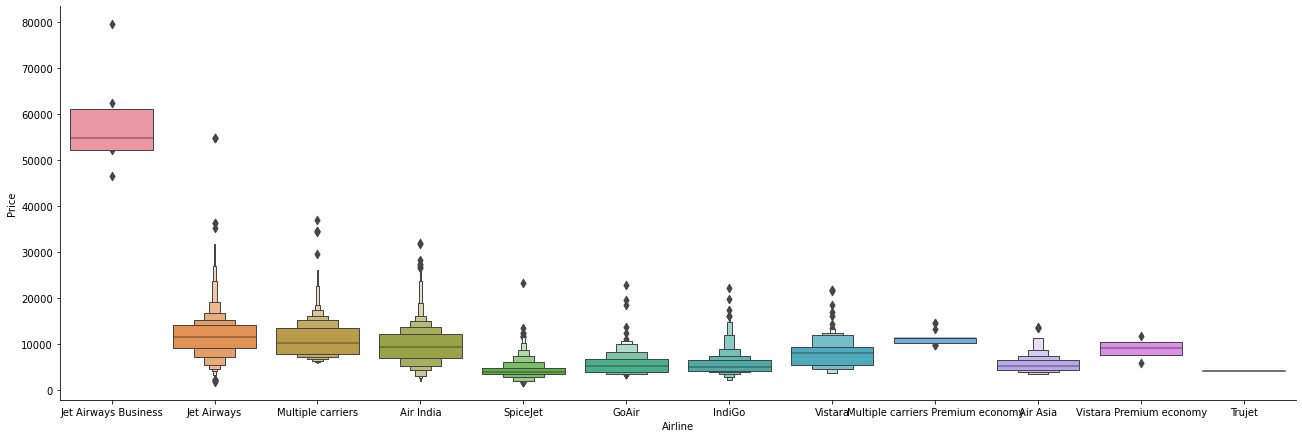

In [30]:
#let's viusalize dataset
sns.catplot(x = 'Airline', y = 'Price', data = train_data.sort_values('Price', ascending = False),kind = 'boxen', height = 6, aspect = 3)


 - From above plot the we can see that Jet Airways airlnie have highest Price.
 

In [31]:
##as Airline feature is Nominal Categorical data we do OneHotEncoding
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [32]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

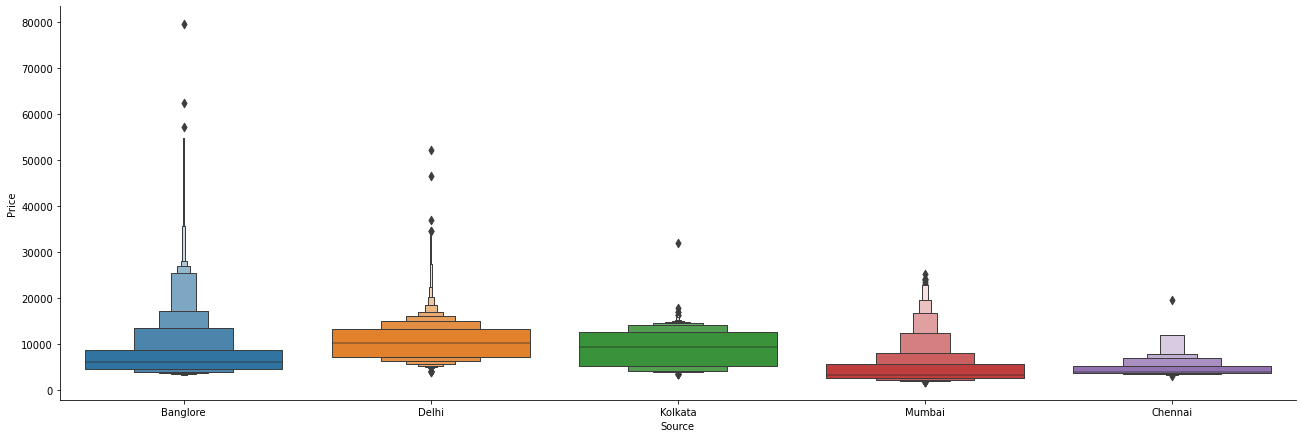

In [33]:
#let's viusalize dataset
sns.catplot(x = 'Source', y = 'Price', data = train_data.sort_values('Price', ascending = False),kind = 'boxen', height = 6, aspect = 3)

In [34]:
##As Source feature is Nominal Categorical Data we will perform OneHotENcoding

Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [35]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [36]:
## As Destination is Nominal categorical data we will perform OneHotEncoding

Destination =  train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [37]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrvial_Minutes,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [38]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [39]:
## Additional_info contains almost 80% no_info 
## Route and Total_Stops are related to each other.

In [40]:
train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [41]:
train_data.shape

(10682, 13)

In [42]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [43]:
##It is case of Ordinal categorical variable we perform LabelEncoder
##Here we assigned values with corresponding keys.
train_data.replace({'non-stop':0, '1 stop': 1, '2 stops':2, '3 stops': 3, '4 stops': 4}, inplace = True)

In [44]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrvial_Minutes,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [45]:
##Concatenate Dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [46]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrvial_Minutes,Duration_hour,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [47]:
data_train.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

In [48]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrvial_Minutes,Duration_hour,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
data_train.shape

(10682, 30)

### Test Data

In [50]:
test_data = pd.read_excel("C:\PythonCSV\CSV_file\Flight_price_prediction\Test_set.xlsx")

In [51]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [52]:
test_data.shape

(2671, 10)

### Data Preprocessing

In [53]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [54]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [55]:
test_data['Journey_day'] = pd.to_datetime(test_data.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [56]:
test_data['Journey_month'] = pd.to_datetime(test_data.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [57]:
test_data.drop('Date_of_Journey', axis= 1, inplace = True)

In [58]:
##Departure Time is when a plane leaves the gate.
##Similar to DateofJourney we can extract values from Dep_Time.
##Extracting hours from Dep_time
test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour

##Extracting minutes from Deptime
test_data['Dep_minutes'] = pd.to_datetime(test_data['Dep_Time']).dt.minute

In [59]:
test_data.drop('Dep_Time', axis= 1, inplace = True)

In [60]:
##Arrival time is when the plane pulls up to gate.
##Similar to Day of Journey we can exttract values from arrival_time.

##Extraccting Hour
test_data['Arrival_Hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour

##Extracting Minutes
test_data['Arrvial_Minutes'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute

##now we can drop the arrivale time feature as it is no of use.
test_data.drop(['Arrival_Time'], axis = 1, inplace = True)

In [61]:
## Time taken by plane to reach destination is called Duration.
## It is difference between Departure time and arrival time.

##assining and coverting duration column to lists
duration = list(test_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:  ##check if duration contains only hour or minute
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m" #adds 0 minute
        else:
            duration[i] = "0h " + duration[i]  ##adds 0 hour
        
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))  ##extract hours from duration
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))  ##extract only minutes from duration
    

In [62]:
#now we adding duration_hours and durations_mins list to train_data dataframe

test_data['Duration_hour'] = duration_hours
test_data['Duration_mins'] = duration_mins

In [63]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrvial_Minutes,Duration_hour,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45,2,50


In [64]:
##as Airline feature is Nominal Categorical data we do OneHotEncoding
Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [65]:
##As Source feature is Nominal Categorical Data we will perform OneHotENcoding

Source = test_data[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [66]:
## As Destination is Nominal categorical data we will perform OneHotEncoding

Destination =  test_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [67]:
## Additional_info contains almost 80% no_info 
## Route and Total_Stops are related to each other.

test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [68]:
##It is case of Ordinal categorical variable we perform LabelEncoder
##Here we assigned values with corresponding keys.
test_data.replace({'non-stop':0, '1 stop': 1, '2 stops':2, '3 stops': 3, '4 stops': 4}, inplace = True)

In [69]:
test_data.shape

(2671, 13)

In [70]:
##Concatenate Dataframe --> train_data + Airline + Source + Destination

data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

In [71]:
data_test.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

In [72]:
data_test.head()

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrvial_Minutes,Duration_hour,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,10h 55m,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,4h,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,23h 45m,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,13h,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2h 50m,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [73]:
data_test.drop('Duration', axis = 1, inplace = True)

In [74]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrvial_Minutes,Duration_hour,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [75]:
test_data.shape

(2671, 13)

In [76]:
data_test.shape

(2671, 28)

### Feature Selection
 - Finding out best feature which will contribute and have good relation with target variable, following are some of the feature selection methos.
 1. Heatmap
 2. SelectKbest
 3. feature_importance_

In [77]:
data_train.shape

(10682, 30)

In [78]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minutes', 'Arrival_Hour', 'Arrvial_Minutes', 'Duration_hour',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [79]:
X = data_train.drop('Price', axis = 1)

In [80]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrvial_Minutes,Duration_hour,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [81]:
y = data_train['Price']

In [82]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<AxesSubplot:>

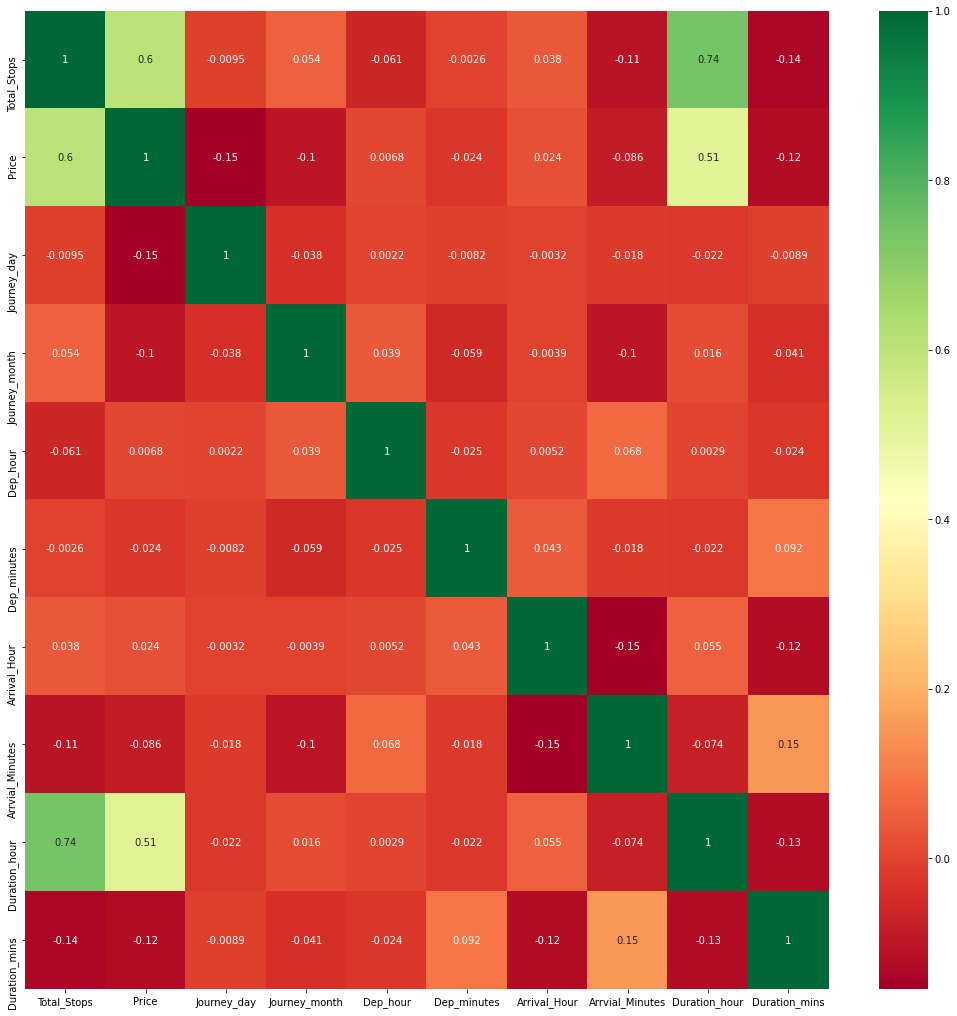

In [83]:
##we finde correlation between independent variable and dependent variable
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = 'RdYlGn')

In [84]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_Hour,Arrvial_Minutes,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [85]:
##we see that feature importance using extratree regresssor
from sklearn.ensemble import ExtraTreesRegressor

In [86]:
selection = ExtraTreesRegressor()

In [87]:
selection.fit(X,y)

ExtraTreesRegressor()

In [88]:
print(selection.feature_importances_)

[2.47930863e-01 1.43831450e-01 5.40118261e-02 2.45210937e-02
 2.09455633e-02 2.80420109e-02 1.87699709e-02 9.41001647e-02
 1.80848842e-02 1.06167137e-02 1.71229683e-03 1.91624920e-02
 1.39176423e-01 6.75603591e-02 2.04381868e-02 8.83570927e-04
 3.07428643e-03 1.11123753e-04 5.25981830e-03 8.73069809e-05
 6.49262566e-04 1.41206174e-02 3.22530191e-03 7.97064088e-03
 8.73844730e-03 1.52561193e-02 6.64346853e-03 5.32835007e-04
 2.45429032e-02]


- We plot graph of the feature importance for better visualization

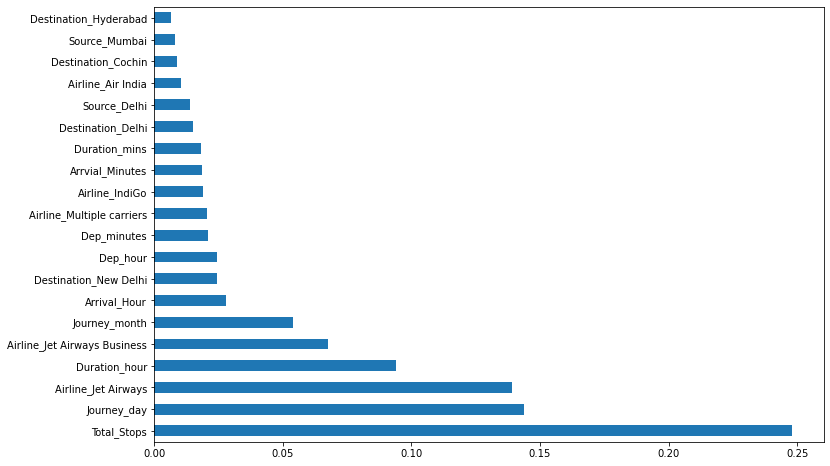

In [89]:
plt.figure(figsize = (12,8))
feat_importance = pd.Series(selection.feature_importances_, index = X.columns)
feat_importance.nlargest(20).plot(kind = 'barh')
plt.show()

 - We can see that total_Stops feature has more importance follow by journey_day, jet_airways, durration_hour 

In [90]:
#Now we split dataset into train_data & test_data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [91]:
print(x_train.shape, x_test.shape)

(8545, 29) (2137, 29)


In [92]:
print(y_train.shape, y_test.shape)

(8545,) (2137,)


In [93]:
##Here we are using RandomForestRegressor algorithm 
from sklearn.ensemble import RandomForestRegressor

In [94]:
forest = RandomForestRegressor()

In [95]:
##Now we train the model
forest.fit(x_train, y_train)

RandomForestRegressor()

In [96]:
##Now we predict model on test data
pred_data = forest.predict(x_test)

In [97]:
pred_data

array([16800.31      ,  5477.58      ,  8883.56      , ...,
        6618.98      , 12909.699     , 12964.04078571])

In [98]:
forest.score(x_test, y_test)

0.7971238443875381

In [99]:
forest.score(x_train, y_train)

0.9540495214521334

<AxesSubplot:xlabel='Price', ylabel='Density'>

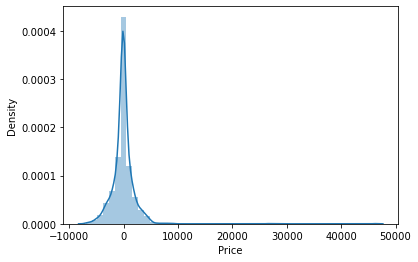

In [100]:
sns.distplot(y_test - pred_data)

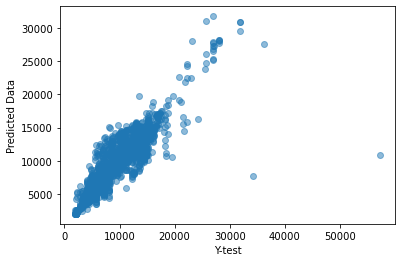

In [101]:
plt.scatter(y_test, pred_data, alpha = 0.5)
plt.xlabel('Y-test')
plt.ylabel('Predicted Data')
plt.show()

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [103]:
mse = mean_squared_error(y_test, pred_data)

In [104]:
mse

4374427.094145315

In [105]:
mae = mean_absolute_error(y_test, pred_data)
mae

1176.3598032646134

In [106]:
rmse = np.sqrt(mean_squared_error(y_test, pred_data))
rmse

2091.51311115788

In [107]:
score_r2 = r2_score(y_test, pred_data)
score_r2

0.7971238443875381

#### Hyperparameter Tunning
 - We do the hyperparameter tunning using RandomsizedSearchCV method.
 - We assign hyperparameters in the form of dictionary
 - Then fit the model
 - Check the best parameters and best score

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
#Numeber of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 12)]
##Number of feature to consider at every split
max_features = ['auto', 'sqrt']

### Maximum level of trees
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30,num = 6)]

###maximum number of samples required to split node
min_samples_split = [2,5, 10, 15]

##minimum number of samples requred at each leaf node
min_samples_leaf = [1,2,5,10]

In [110]:
##create random grid as dictionary
random_grid = {"n_estimators": n_estimators,
               "max_features": max_features,
              "max_depth":max_depth,
              "min_samples_split": min_samples_split,
              "min_samples_leaf":min_samples_leaf}

In [111]:
rf_random = RandomizedSearchCV(estimator= forest, param_distributions= random_grid, scoring = 'neg_mean_squared_error', n_iter= 10, cv = 5, verbose = 2, random_state= 42, n_jobs = 1)

In [112]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=754, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=754, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=  43.1s
[CV] n_estimators=754, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.1s remaining:    0.0s


[CV]  n_estimators=754, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=  41.9s
[CV] n_estimators=754, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=754, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=  42.6s
[CV] n_estimators=754, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=754, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=  45.2s
[CV] n_estimators=754, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=754, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=  37.1s
[CV] n_estimators=918, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=918, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20, total=  48.3s
[CV] n_estimators=918, min_samples_split=15

[CV]  n_estimators=590, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=  11.2s
[CV] n_estimators=590, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=590, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   9.8s
[CV] n_estimators=590, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=590, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   9.2s
[CV] n_estimators=590, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=590, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=  14.9s
[CV] n_estimators=590, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=590, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=  13.3s
[CV] n_estimators=590, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 17.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [113]:
rf_random.best_params_

{'n_estimators': 754,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [114]:
prediction = rf_random.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

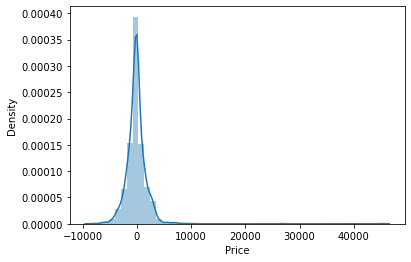

In [115]:
sns.distplot(y_test - prediction)


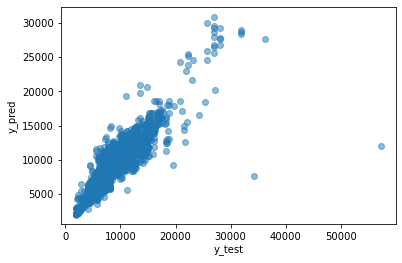

In [116]:
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [117]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 1172.6034179901683
MSE: 4042043.498440783
RMSE: 2010.4833991955227


#### Save the model to reuse it again

In [118]:
import pickle

In [120]:
##open a file, where we want to store
file = open("flight_rf.pkl", 'wb')

In [121]:
##dump information to that file
pickle.dump(forest, file)

In [122]:
model = open('flight_rf.pkl','rb')

In [123]:
random = pickle.load(model)

In [124]:
y_prediction = random.predict(x_test)

In [125]:
r2_score(y_test, y_prediction)

0.7971238443875381